In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure AWS credentials
aws_access_key_id = 'AKIA***AWHA'
aws_secret_access_key = 'MSuJ***0mX/'
aws_default_region = 'us-east-2'

# Set AWS credentials
boto3.setup_default_session(
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    region_name=aws_default_region
)

s3 = boto3.client('s3')

In [3]:
bucket_name = 'amazon-reviews-project-xh'
file_key = 'landing/amazon_reviews_multilingual_US_v1_00.tsv'

# Retrieve the object from S3
obj = s3.get_object(Bucket=bucket_name, Key=file_key)

In [4]:
# Read the object data using Pandas
df = pd.read_csv(obj['Body'], delimiter='\t', on_bad_lines='skip')

In [5]:
df.head(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4.0,0.0,1.0,N,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13
1,US,53096399,R1BALOA11Z06MT,1559947608,381720534,The 22 Immutable Laws of Marketing,Books,4.0,0.0,0.0,N,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17
2,US,53096332,R1LLAY5W5PZUS4,0671701800,860650224,Contact,Books,5.0,1.0,2.0,N,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30
3,US,53096335,R3R9VTJ82FXECQ,0425132153,624269601,Good Omens,Books,5.0,0.0,0.0,N,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11
4,US,51747709,R1P5J3FNBWTFXY,0517122707,161411385,A Confederacy of Dunces,Books,5.0,0.0,0.0,N,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17
5,US,53095881,R2XQTCOBWNCEAC,0345350499,627223385,The Mists of Avalon,Books,5.0,0.0,0.0,N,N,One of the best books I've ever read!,Marion Zimmer Bradley brings King Arthur's cou...,1995-11-02
6,US,53096485,R87VUTMFOE6N,B000002OTL,877615083,Pulp Fiction: Music From The Motion Picture,Music,5.0,0.0,1.0,N,N,Pulp Fiction Soundtrack: EXCELLENT!!!!,Pulp Fiction the movie is one of my favorite m...,1995-11-11
7,US,53096485,RVS529AN21RR3,6302136105,701401373,The Doors [VHS],Video,5.0,1.0,2.0,N,N,The Doors: The best movie ever,The Doors is one of my favorite movies. Val Ki...,1995-11-11
8,US,53095748,RG6LPC4W8LN29,0399134204,31287929,The Joy Luck Club,Books,5.0,0.0,1.0,N,N,Gives a deeper understanding of chinese culture.,The book in some way or another gives a deeper...,1995-11-15
9,US,53071277,RDFIE1IF0IYFH,0887306667,381720534,The 22 Immutable Laws of Marketing: Violate T...,Books,5.0,0.0,0.0,N,N,One of the best marketing books ever written. ...,This book is a fast read. It covers strategi...,1996-05-12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900886 entries, 0 to 6900885
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   marketplace        object 
 1   customer_id        int64  
 2   review_id          object 
 3   product_id         object 
 4   product_parent     int64  
 5   product_title      object 
 6   product_category   object 
 7   star_rating        float64
 8   helpful_votes      float64
 9   total_votes        float64
 10  vine               object 
 11  verified_purchase  object 
 12  review_headline    object 
 13  review_body        object 
 14  review_date        object 
dtypes: float64(3), int64(2), object(10)
memory usage: 789.7+ MB


In [7]:
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,6.900886e+06,6.900886e+06,6.900885e+06,6.900885e+06,6.900885e+06
mean,2.918797e+07,4.933005e+08,4.306591e+00,2.044545e+00,3.251676e+00
std,1.565196e+07,2.861562e+08,1.146197e+00,3.184494e+01,3.633977e+01
min,1.000100e+04,2.254720e+05,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.501694e+07,2.495109e+08,4.000000e+00,0.000000e+00,0.000000e+00
50%,2.881076e+07,4.965205e+08,5.000000e+00,0.000000e+00,0.000000e+00
75%,4.414300e+07,7.448221e+08,5.000000e+00,1.000000e+00,2.000000e+00
max,5.309659e+07,9.999881e+08,5.000000e+00,2.755000e+04,2.872700e+04


In [12]:
df.dtypes

marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object

In [8]:
df.dropna()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4.0,0.0,1.0,N,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13
1,US,53096399,R1BALOA11Z06MT,1559947608,381720534,The 22 Immutable Laws of Marketing,Books,4.0,0.0,0.0,N,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17
2,US,53096332,R1LLAY5W5PZUS4,0671701800,860650224,Contact,Books,5.0,1.0,2.0,N,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30
3,US,53096335,R3R9VTJ82FXECQ,0425132153,624269601,Good Omens,Books,5.0,0.0,0.0,N,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11
4,US,51747709,R1P5J3FNBWTFXY,0517122707,161411385,A Confederacy of Dunces,Books,5.0,0.0,0.0,N,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900881,US,52303,R16DAHIWNXFOYI,B00QW8TYWO,828652896,Crossy Road,Mobile_Apps,5.0,0.0,0.0,N,Y,Five Stars,very fun game,2015-08-31
6900882,US,565563,R1DS6EBGAEJDB5,B00PSLQYWE,156264553,Downton Abbey Season 5,Digital_Video_Download,5.0,0.0,0.0,N,Y,Five Stars,Great,2015-08-31
6900883,US,254421,R3HEHT8JUA33VW,B000FC1LOC,354573823,My Sister's Keeper: A Novel (Wsp Readers Club),Digital_Ebook_Purchase,5.0,0.0,0.0,N,N,and she has beautifully written and explored t...,"This is my first book from Jodi, and she has b...",2015-08-31
6900884,US,146004,RVK4I33L93536,B008T4HHWS,599809487,Scent of a Woman,Digital_Video_Download,5.0,0.0,0.0,N,N,Like this!,Good movie!,2015-08-31


In [10]:
df.drop_duplicates()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4.0,0.0,1.0,N,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13
1,US,53096399,R1BALOA11Z06MT,1559947608,381720534,The 22 Immutable Laws of Marketing,Books,4.0,0.0,0.0,N,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17
2,US,53096332,R1LLAY5W5PZUS4,0671701800,860650224,Contact,Books,5.0,1.0,2.0,N,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30
3,US,53096335,R3R9VTJ82FXECQ,0425132153,624269601,Good Omens,Books,5.0,0.0,0.0,N,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11
4,US,51747709,R1P5J3FNBWTFXY,0517122707,161411385,A Confederacy of Dunces,Books,5.0,0.0,0.0,N,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900881,US,52303,R16DAHIWNXFOYI,B00QW8TYWO,828652896,Crossy Road,Mobile_Apps,5.0,0.0,0.0,N,Y,Five Stars,very fun game,2015-08-31
6900882,US,565563,R1DS6EBGAEJDB5,B00PSLQYWE,156264553,Downton Abbey Season 5,Digital_Video_Download,5.0,0.0,0.0,N,Y,Five Stars,Great,2015-08-31
6900883,US,254421,R3HEHT8JUA33VW,B000FC1LOC,354573823,My Sister's Keeper: A Novel (Wsp Readers Club),Digital_Ebook_Purchase,5.0,0.0,0.0,N,N,and she has beautifully written and explored t...,"This is my first book from Jodi, and she has b...",2015-08-31
6900884,US,146004,RVK4I33L93536,B008T4HHWS,599809487,Scent of a Woman,Digital_Video_Download,5.0,0.0,0.0,N,N,Like this!,Good movie!,2015-08-31


In [13]:
pip install s3fs

Note: you may need to restart the kernel to use updated packages.


In [14]:
results = df.groupby('customer_id').star_rating.agg(['count', 'min', 'max', 'mean'])
print(results)

             count  min  max  mean
customer_id                       
10001            2  5.0  5.0   5.0
10018            1  4.0  4.0   4.0
10019            1  5.0  5.0   5.0
10020            1  5.0  5.0   5.0
10022            2  5.0  5.0   5.0
...            ...  ...  ...   ...
53096567         1  1.0  1.0   1.0
53096575         1  1.0  1.0   1.0
53096582         2  4.0  4.0   4.0
53096584         4  2.0  5.0   4.0
53096589         1  5.0  5.0   5.0

[4097784 rows x 4 columns]


In [16]:
results.to_csv('s3://amazon-reviews-project-xh/star_rating_analysis.csv', storage_options={"key": "AKIA***AWHA", "secret": "MSuJ***0mX/"})

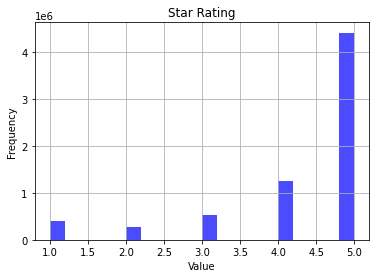

In [17]:
#histogram
rating = df['star_rating']
plt.hist(rating, bins=20, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Star Rating')
plt.grid(True)
plt.show()

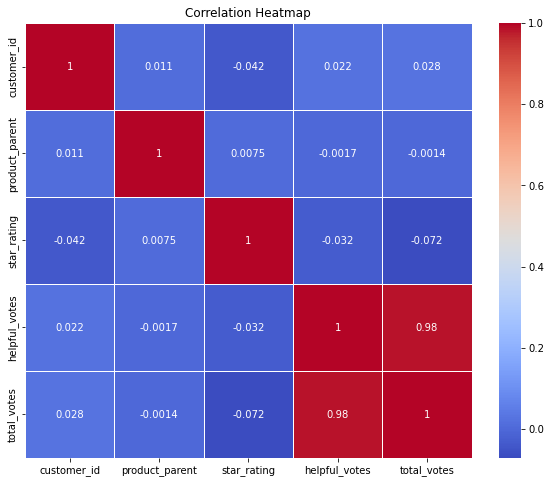

In [18]:
#heatmap

#correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
#only showing int and float64 variables

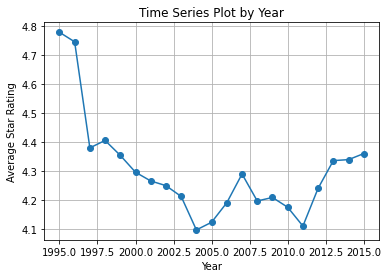

In [19]:
#time series plot
#convert date to datetime
df['review_date'] = pd.to_datetime(df['review_date'])
#group by year with each year's mean
df_grouped = df.groupby(df['review_date'].dt.year)['star_rating'].mean().reset_index()

plt.plot(df_grouped['review_date'], df_grouped['star_rating'], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Average Star Rating")
plt.title("Time Series Plot by Year")
plt.grid()
plt.show()

In [20]:
# To work with Amazon S3 install boto3,  s3fs
%pip install "boto3>=1.28" "s3fs>=2023.3.0"
# If your files are in Parquet format, install pyarrow and fastparquet
%pip install pyarrow fastparquet
# For visualizations, install seaborn
%pip install seaborn

     |████████████████████████████████| 135 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.4 MB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 34.1 MB/s eta 0:00:01
INFO: pip is looking at multiple versions of fsspec to determine which version is compatible with other requirements. This could take a while.
  Using cached fsspec-2023.10.0-py3-none-any.whl (166 kB)
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
  Using cached s3fs-2023.10.0-py3-none-any.whl (28 kB)
     |████████████████████████████████| 173 kB 108.1 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 173 kB 105.7 MB/s eta 0:00:01
     |████████████████████████████████| 173 kB 26.5 MB/s eta 0:00:01
     |████████████████████████████████| 163 kB 111.7 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 7.3 

In [21]:
import os
# To work with Amazon S3 storage, set the following variables using your AWS Access Key and Secret Key
# Set the Region to where your files are stored in S3.
access_key = 'AKIA***AWHA'
secret_key = 'MSuJ***0mX/'
# Set the environment variables so boto3 can pick them up later
os.environ['AWS_ACCESS_KEY_ID'] = access_key
os.environ['AWS_SECRET_ACCESS_KEY'] = secret_key
encoded_secret_key = secret_key.replace("/", "%2F")
aws_region = "us-east-2"
# Set this to the name of your bucket where the files are stored
aws_bucket_name = "amazon-reviews-project-xh"
mount_name = "landing/amazon_reviews_multilingual_US_v1_00.tsv"